In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [2]:

ticker = yf.Ticker("MSFT")

In [3]:

start_date = "2016-06-14"

In [4]:

df = ticker.history(start=start_date, end=None)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,44.892195,45.072120,44.595311,44.829220,42577100,0.0,0.0
2016-06-15 00:00:00-04:00,44.784211,45.090090,44.703243,44.703243,33757600,0.0,0.0
2016-06-16 00:00:00-04:00,44.550319,45.404981,44.541321,45.333008,31188600,0.0,0.0
2016-06-17 00:00:00-04:00,45.350997,45.368990,44.820208,45.099098,45710500,0.0,0.0
2016-06-20 00:00:00-04:00,45.557920,45.728855,45.009138,45.045124,35607900,0.0,0.0


In [5]:

candlestick_trace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

In [6]:

layout = go.Layout(
    title='MSFT Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', rangemode='normal')
)

In [7]:

fig = go.Figure(data=[candlestick_trace], layout=layout)


fig.update_layout(xaxis_rangeslider_visible=False)


fig.show()

In [8]:

col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,44.829220,44.892195,45.072120,44.595311,42577100,0.0,0.0
2016-06-15 00:00:00-04:00,44.703243,44.784211,45.090090,44.703243,33757600,0.0,0.0
2016-06-16 00:00:00-04:00,45.333008,44.550319,45.404981,44.541321,31188600,0.0,0.0
2016-06-17 00:00:00-04:00,45.099098,45.350997,45.368990,44.820208,45710500,0.0,0.0
2016-06-20 00:00:00-04:00,45.045124,45.557920,45.728855,45.009138,35607900,0.0,0.0


In [9]:
df.tail()
df.shape

(1937, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1937 entries, 2016-06-14 00:00:00-04:00 to 2024-02-23 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1937 non-null   float64
 1   Open          1937 non-null   float64
 2   High          1937 non-null   float64
 3   Low           1937 non-null   float64
 4   Volume        1937 non-null   int64  
 5   Dividends     1937 non-null   float64
 6   Stock Splits  1937 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.1 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1937.0,1.825174e+02,9.955555e+01,4.356971e+01,9.133552e+01,1.732500e+02,2.647189e+02,4.197737e+02
Open,1937.0,1.824529e+02,9.950990e+01,4.401054e+01,9.119449e+01,1.736075e+02,2.643389e+02,4.197837e+02
High,1937.0,1.842694e+02,1.005070e+02,4.421745e+01,9.169020e+01,1.760158e+02,2.688836e+02,4.200432e+02
Low,1937.0,1.805816e+02,9.849860e+01,4.321885e+01,9.026374e+01,1.702704e+02,2.618209e+02,4.143238e+02
Volume,1937.0,2.861878e+07,1.239388e+07,7.425600e+06,2.088680e+07,2.561110e+07,3.269230e+07,1.335030e+08
Dividends,1937.0,8.477026e-03,6.802181e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e-01
Stock Splits,1937.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
df.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Close,0
Open,0
High,0
Low,0
Volume,0
Dividends,0
Stock Splits,0


In [13]:
df.duplicated().sum()

0

In [14]:
df[['Close']]

,Close
Date,
2016-06-14 00:00:00-04:00,44.829220
2016-06-15 00:00:00-04:00,44.703243
2016-06-16 00:00:00-04:00,45.333008
2016-06-17 00:00:00-04:00,45.099098
2016-06-20 00:00:00-04:00,45.045124
...,...
2024-02-16 00:00:00-05:00,404.059998
2024-02-20 00:00:00-05:00,402.790009
2024-02-21 00:00:00-05:00,402.179993


In [15]:
# normalize data
df2 = df.copy(deep=True)
scaler = MinMaxScaler(feature_range=(0,15)).fit(df2.Low.values.reshape(-1,1))
df2['Open'] = scaler.transform(df2.Open.values.reshape(-1,1))
df2['High'] = scaler.transform(df2.High.values.reshape(-1,1))
df2['Low'] = scaler.transform(df2.Low.values.reshape(-1,1))
df2['Close'] = scaler.transform(df2.Close.values.reshape(-1,1))
data = df2[['Open','High','Low', 'Close']].values
data.shape

(1937, 4)

In [16]:
data

array([[ 0.06763648,  0.07490905,  0.05563648,  0.06509105],
       [ 0.06327181,  0.07563537,  0.0599991 ,  0.0599991 ],
       [ 0.05381794,  0.08836321,  0.05345423,  0.08545407],
       ...,
       [14.42790636, 14.5135962 , 14.30866736, 14.50914938],
       [14.83291263, 14.93962035, 14.7674327 , 14.89192524],
       [15.05441376, 15.06209239, 14.78360039, 14.83897536]])

In [17]:
seq_len=11
sequences=[]
for index in range(len(data) - seq_len + 1):
    sequences.append(data[index: index + seq_len])
sequences= np.array(sequences)

In [18]:
valid_set_size_percentage = 10
test_set_size_percentage = 10



X = df2[['Open', 'High', 'Low', 'Close']].values
y = df2['Close'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(valid_set_size_percentage + test_set_size_percentage) / 100, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=test_set_size_percentage / (valid_set_size_percentage + test_set_size_percentage), random_state=42)

In [19]:
x_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

x_valid = torch.tensor(X_valid).float()
y_valid = torch.tensor(y_valid).float()

train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

valid_dataset = TensorDataset(x_valid,y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [21]:
print("Shapes before reshaping:")
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

Shapes before reshaping:
y_train shape: torch.Size([1549])
y_valid shape: torch.Size([194])
y_test shape: torch.Size([194])


In [22]:

y_train = y_train.view(-1, 1)
y_valid = y_valid.view(-1, 1)
y_test = y_test.view(-1, 1)

print("Shapes after reshaping:")
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

Shapes after reshaping:
y_train shape: torch.Size([1549, 1])
y_valid shape: torch.Size([194, 1])
y_test shape: torch.Size([194, 1])


In [23]:
y_train.shape

torch.Size([1549, 1])

In [24]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_valid.shape, y_valid.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: torch.Size([1549, 4]) torch.Size([1549, 1])
Validation set shape: torch.Size([194, 4]) torch.Size([194, 1])
Test set shape: torch.Size([194, 4]) torch.Size([194, 1])


In [25]:


class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [26]:
input_size = 4
hidden_size1 = 8
hidden_size2 = 8
output_size = 1
mlp_regressor = MLPRegressor(input_size, hidden_size1,hidden_size2, output_size)

In [27]:
print(mlp_regressor)
print(f'Total trainable parameters: {sum(p.numel() for p in mlp_regressor.parameters() if p.requires_grad)}')

MLPRegressor(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)
Total trainable parameters: 153


In [28]:
x_train.shape

torch.Size([1549, 4])

In [29]:
criterion = nn.MSELoss()

In [30]:
num_epochs=150

In [31]:

optimizer = torch.optim.Adam(mlp_regressor.parameters(), lr=0.001, weight_decay=1e-5)

In [32]:

best_valid_loss = float('inf')
early_stopping_counter = 0
patience = 30  

In [33]:
mlp_regressor.train()

MLPRegressor(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [34]:


for epoch in range(num_epochs):
    # Forward pass
    y_pred = mlp_regressor(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

 # Print the loss every few epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

     # Calculate validation loss
    with torch.no_grad():
        y_pred_valid = mlp_regressor(x_valid)
        valid_loss = criterion(y_pred_valid, y_valid)
        
        # Check if validation loss has improved
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(mlp_regressor.state_dict(), 'saved_weights.pt')
            early_stopping_counter = 0  # Reset counter if validation loss improves
        else:
            early_stopping_counter += 1
            
        # Check if early stopping criteria met
        if early_stopping_counter >= patience:
            print('Early stopping triggered.')
            break

print('Training finished.')

Epoch [10/150], Loss: 44.4062
Epoch [20/150], Loss: 41.5807
Epoch [30/150], Loss: 38.7495
Epoch [40/150], Loss: 35.9651
Epoch [50/150], Loss: 33.0072
Epoch [60/150], Loss: 29.8465
Epoch [70/150], Loss: 26.4857
Epoch [80/150], Loss: 22.9597
Epoch [90/150], Loss: 19.3325
Epoch [100/150], Loss: 15.6971
Epoch [110/150], Loss: 12.1774
Epoch [120/150], Loss: 8.9222
Epoch [130/150], Loss: 6.0870
Epoch [140/150], Loss: 3.8023
Epoch [150/150], Loss: 2.1338
Training finished.


In [35]:
mlp_regressor.eval()
with torch.no_grad():
    y_pred = mlp_regressor(x_test)

In [36]:

y_pred_reshaped = y_pred.view(-1, 1)
y_test_reshaped = y_test.view(-1, 1)

In [37]:

scaler_single_feature = MinMaxScaler(feature_range=(0, 15)).fit(y_train.reshape(-1, 1))

y_pred_original = scaler_single_feature.inverse_transform(y_pred_reshaped)
y_test_original = scaler_single_feature.inverse_transform(y_test_reshaped)

In [38]:

mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
explained_variance = explained_variance_score(y_test_original, y_pred_original)

In [39]:

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'Explained Variance: {explained_variance:.4f}')

MSE: 2.1409
MAE: 1.0878
Explained Variance: 0.9364


In [40]:
model2=torch.load('saved_weights.pt')

In [41]:
x_test= torch.tensor(x_test).float()

with torch.no_grad():
  y_test_pred = mlp_regressor(x_test)

y_test_pred = y_test_pred.numpy()[0]

C:\Users\kuria\AppData\Local\Temp\ipykernel_15488\985648846.py:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



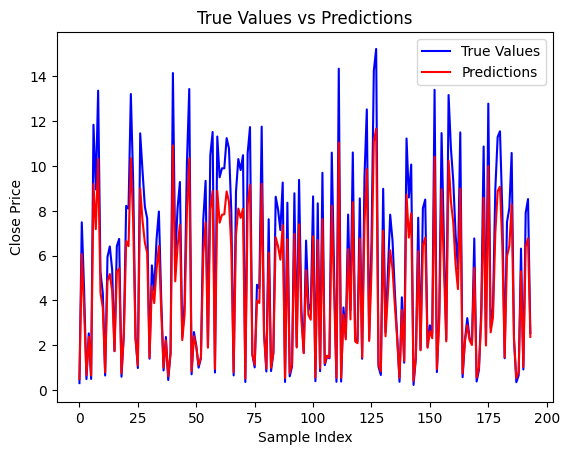

In [42]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(y_test)), y_test_original, label='True Values', color='blue')
plt.plot(np.arange(len(y_test)), y_pred_original, label='Predictions', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()